In [ ]:
_ = !chimera --script ./src/chimera_vis.py

In [ ]:
import pygraphviz as pgv
G = pgv.AGraph("./misc_files/graph.dot")
G.layout(prog='dot')
G.draw('./images/graph_algo.png')

##### Expand this block to check out the code used to generating figure 3

In [45]:
# importing the core class defined above for motif detection
import matplotlib.pyplot as plt
from matplotlib import gridspec
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf') # Crisper images
#_ = plt.xkcd() # making plots look a bit whacky

import networkx as nx
import pygraphviz as pgv
from networkx.drawing.nx_agraph import graphviz_layout
import h5py
import numpy as np
from tqdm import tqdm
import glob

In [8]:
%%writefile test.fa
>test
AACGTACGGAGGCGTAGCGGGAGTAGCGGGATGCGGGTACGGGTGGAGCT
AGGCGGACGGGGGAAGCTGTAGCGGGTGATCGGGGTAGTCTGAGCTGACG
GGGGGGAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAGGGAAGGGAAGGGAGGGGAAAAAA

Overwriting test.fa


In [23]:
!python ./src/multiStemFinder.py test.fa test_stems 4

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 164.97it/s]


In [63]:
!python ./src/multiQuadFinder.py test_stems.hdf5 test_quads 12 4

100%|███████████████████████████████████████| 118/118 [00:00<00:00, 1500.93it/s]


In [64]:
def load_hdf5(fn, name):
    f = h5py.File(fn,'r')
    a = np.array(f.get(name), dtype=int)
    f.close()
    return np.array(a)

seq = ''.join([x.rstrip('\n') for x in open('test.fa').readlines()[1:]])
print (len(seq))

186


(118, 3)


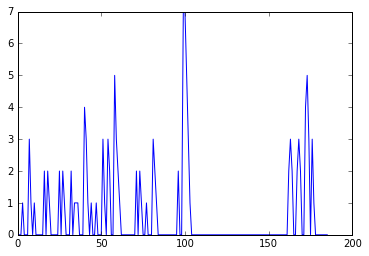

In [65]:
%matplotlib inline

stems = load_hdf5('test_stems.hdf5', 'stems')
print (stems.shape)

stem_array = np.zeros(len(seq))
for i in stems[:, 0]:
    stem_array[i] += 1
    
plt.plot(stem_array)

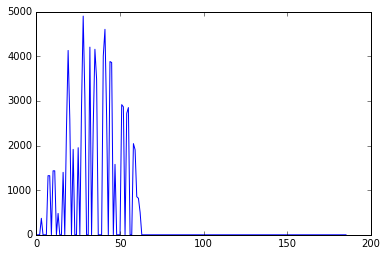

In [66]:
quad_array = np.zeros(len(seq))
for i in range(int(1e5), len(seq)+int(1e5), int(1e5)):
    fns = glob.glob('./test_quads/%d/*.hdf5' % i)
    for j in fns:
        q = load_hdf5(j, 'quads')
        for k in q.flatten():
            quad_array[k] += 1
        break

plt.plot(quad_array)

In [ ]:
def plot_example_summary_graph():
    fig = plt.figure(figsize=(14,7))
    fig.set_facecolor('#eeeeee')
    gs = gridspec.GridSpec(10,10)

    w = []
    for i in SG.G.edges(data=True):
        w.append(i[2]['weight'])

    ax = plt.subplot(gs[:, :5])
    node_pos = graphviz_layout(SG.G, prog='dot')
    node_size = [200 + v * 50 for v in nx.degree(SG.G).values()]
    nx.draw_networkx(SG.G, node_pos, node_size=node_size,
                     with_labels=False, ax=ax)
    ax.set_title('Directed acyclic graph\nof putative stems', fontsize=18)
    ax.set_axis_bgcolor('#eeeeee')
    ax.set_xticks([])
    ax.set_yticks([])
    for i in ax.spines.values():
        i.set_edgecolor('#eeeeee')

    ax = plt.subplot(gs[2:8, 5:7])
    ax.bar([0,1,2,3], [0,len(SG.G.nodes()),
                       len(SG.G.edges()),0], color='dodgerblue')
    ax.set_xticks([1.5, 2.5])
    ax.set_xticklabels(('Number of nodes', 'Number of edges'),
                       rotation=40, horizontalalignment='right')
    ax.set_title('Graph statistics', fontsize=18)
    ax.set_axis_bgcolor('#eeeeee')

    ax = plt.subplot(gs[2:8, 7:])
    _ = ax.hist(w, bins=20, color='dodgerblue')
    ax.set_title('Distribution of\nedge weights', fontsize=18)
    ax.set_ylabel('Frequency', fontsize=16)
    ax.set_xlabel('Edge weight', fontsize=16)
    ax.set_axis_bgcolor('#eeeeee')

    fig.tight_layout()
    
    fig.savefig('./images/summary_graph.png', facecolor='#eeeeee')
    plt.close()
    
plot_example_summary_graph()